<a href="https://colab.research.google.com/github/KhoirotunNisa25/Machine_Learning_2025/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UTS
Khoirotun Nisa / 18 / 2341720057


In [109]:
!pip install --quiet annoy

### 1. Libary

In [110]:
# Import library

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Dataset

In [111]:
# load dataset
df = pd.read_csv('/content/heart.csv')

In [112]:
# info dataset
df.info()
df.describe()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(1025, 14)

Dataset yang diproses adalah `heart.scv`, yaitu dataset medis untuk melihat pengelompokan pasien berdasarkan fitur kesehatan seperti tekanan darah, kolesterol, umur, dan lain-lain. Dataset terdiri dari 1.025 sampel dan 14 fitur (13 fitur bertipe `int64` dan 1 fitur bertipe `float64`).

### 3. Data Preprocessing

In [113]:
print("Missing per kolom:")
print(df.isnull().sum())

Missing per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [114]:
# tidak ada missing value pada data
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2860839876.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [115]:
# buat fitur baru
df['CholAge'] = df['chol'] * df['age']
print("Fitur CholAge berhasil dibuat.")

Fitur CholAge berhasil dibuat.


In [116]:
# Normalisasi / Standarisasi data numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

### 4. Clustering dengan Kmeans dan DBScan


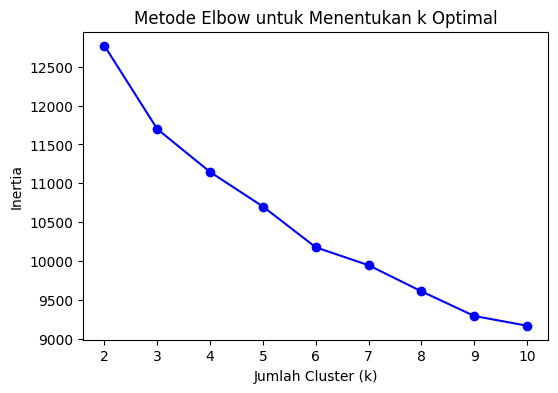

In [117]:
# KMeans

# elbow
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


In [118]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

In [119]:
# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = list(labels_dbscan).count(-1)

print(f"Jumlah cluster ditemukan: {n_clusters_dbscan}")
print(f"Jumlah data noise: {n_noise_dbscan}")

Jumlah cluster ditemukan: 3
Jumlah data noise: 216


In [120]:
print("\n=== EVALUASI CLUSTERING ===")
print("KMeans Silhouette Score:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_kmeans))

# Untuk DBSCAN, pastikan tidak semua label -1
if len(set(labels_dbscan)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, labels_dbscan))
    print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN gagal membentuk cluster (semua noise).")


=== EVALUASI CLUSTERING ===
KMeans Silhouette Score: 0.14675763467709435
KMeans Davies-Bouldin Index: 2.223070890725113
DBSCAN Silhouette Score: 0.009487435690075763
DBSCAN Davies-Bouldin Index: 2.8556977718753753


### 5. Visualisasi Clustering (PCA)

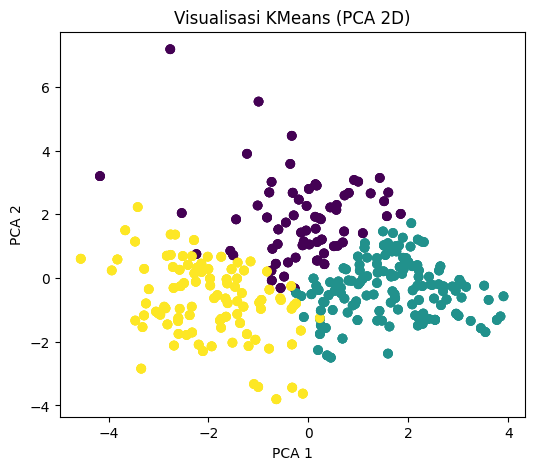

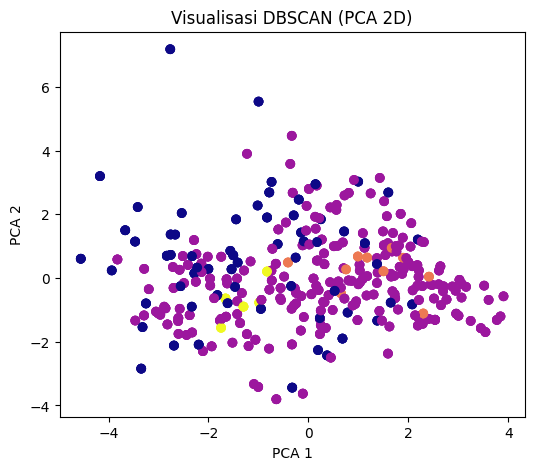

In [121]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("Visualisasi KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='plasma')
plt.title("Visualisasi DBSCAN (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### 6. ANN dengan Annoy

In [137]:
f = X_scaled.shape[1]
annoy_index = AnnoyIndex(f, 'euclidean')
annoy_index.set_seed(42)

for i, v in enumerate(X_scaled):
    annoy_index.add_item(i, v)

annoy_index.build(10)  # 10 trees

# Pilih 3 query point secara acak
query_points = np.random.choice(len(X_scaled), 3, replace=False)

print("\n=== HASIL ANN (Annoy) ===")
for q in query_points:
    neighbors = annoy_index.get_nns_by_item(q, 5, include_distances=True)
    print(f"\nQuery Index: {q}")
    for n, d in zip(neighbors[0], neighbors[1]):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")


=== HASIL ANN (Annoy) ===

Query Index: 882
Neighbor Index: 32 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 882 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 925 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 878 | Distance: 2.5728 | Cluster (KMeans): 2
Neighbor Index: 997 | Distance: 2.5728 | Cluster (KMeans): 2

Query Index: 218
Neighbor Index: 218 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 247 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 601 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 728 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 97 | Distance: 1.7582 | Cluster (KMeans): 2

Query Index: 925
Neighbor Index: 32 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 882 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 925 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 878 | Distance: 2.5728 | Cluster (KMeans): 2
Neighbor Index: 997 | Distance: 2.5728 | Cluster (KMeans): 2


### 7. Kesimpulan

a. Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini
dan jelaskan jawaban anda

Berdasarkan hasil elbow, ditentukan 3 cluster untuk klasterisasi K-Means. DBSCAN dengan `eps=3` dan `min_sample=10` juga menghasilkan 3 cluster, namun menghasilkan 216 data noise (data yang tidak termasuk dalam cluster apapun). Berdasarkan Silhouette Score, kedua metode menghasilkan skor yang cukup rendah (Sangat baik jika skor mendekati 1, sangat kurang jika mendekati 0). Karena K-Means hanya menghasilkan skor sebesar 0.1268, dan DBSCAN sebesar 0.0095. Artinya kualitas pemisahan cluster masih buruk. Tetapi jika dibandingkan antara K-Means dan DBSCAN pada kasus dataset `heart.csv`, maka metode K-Means lebih baik.

b. Nilai metrik terbaik (Silhouette, DBI).

Silhoutte mengukur seberapa baik objek/data berada dalam clusternya sendiri dibandingkan cluster lain, sangat baik jika nilai mendekati 1, dan kurang jika mendekati 0. Sedangkan DBI mengukut rasio antara jarak antar-cluster dengan ukuran cluster itu sendiri, semakin kecil DBI semakin baik.

Berdasarkan hasil pada clustering NO.4, hasil klasterisasi KMeans, dengan `Silhouette Score` 0.1467 dan `DBI` 2.2231, lebih baik daripada DBSCAN, dengan `Silhouette Score` 0.0094 dan `DBI` 2.8557. Walapun begitu, nilai tersebut (Pada K-Means dan DBSCAN) tergolong masih rendah, artinya kualitas pemisahan cluster masih rendah.



c. Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang
sama? Jelaskan jawaban anda.

Berdasarkan hasil pencarian Annoy, seluruh tetangga terdekat dari masing-masing `query point` termasuk dalam cluster yang sama.
Hal ini menunjukkan bahwa hasil `Approximate Nearest Neighbor` konsisten dengan pembagian cluster oleh KMeans, yang berarti struktur kedekatan spasial antar data sejalan dengan hasil clustering.